In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay 
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import set_config
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
adult = pd.read_csv('adult.data.csv')

The above cell is importing all the necessary python libraries we needed to complete this project.

In [22]:
adult_income = pd.get_dummies(adult['income'])
adult = pd.concat([adult_income, adult], axis=1)
adult.drop([" <=50K"], axis=1, inplace=True)

The cell above this one creates a new binary column 1 means they made over 50k and 0 means they made less than or equal to 50k.

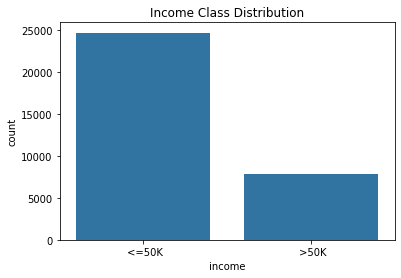

In [23]:
sns.countplot(x='income', data=adult)
plt.title('Income Class Distribution')
plt.show()

Text(0.5, 1.0, 'Sex Distribution')

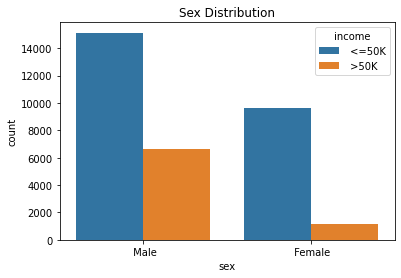

In [24]:
sns.countplot(x='sex', data=adult, hue='income')
plt.title('Sex Distribution')

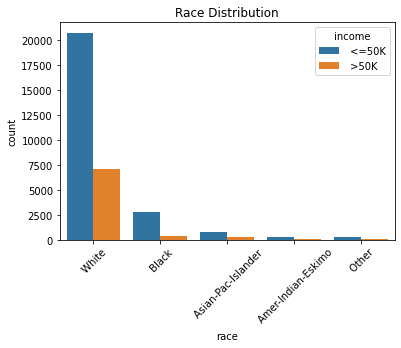

In [25]:
sns.countplot(x='race', data=adult, hue='income')
plt.title('Race Distribution')
plt.xticks(rotation=45)
plt.show()

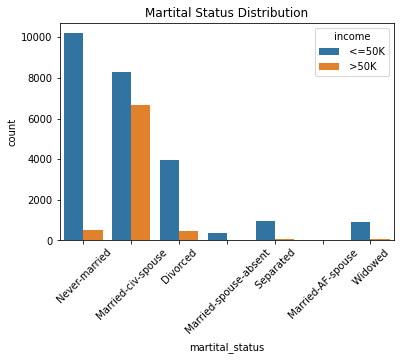

In [26]:
sns.countplot(x='martital_status', data=adult, hue='income')
plt.title('Martital Status Distribution')
plt.xticks(rotation=45)
plt.show()

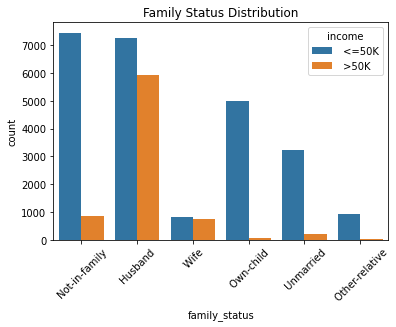

In [27]:
sns.countplot(x='family_status', data=adult, hue='income')
plt.title('Family Status Distribution')
plt.xticks(rotation=45)
plt.show()

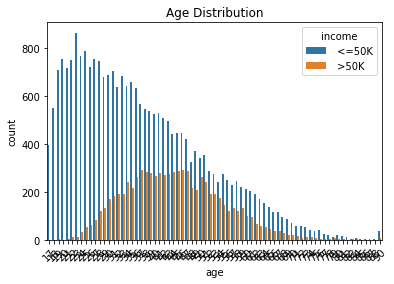

In [28]:
sns.countplot(x='age', data=adult, hue='income')
plt.title('Age Distribution')
plt.xticks(rotation=45)
plt.show()

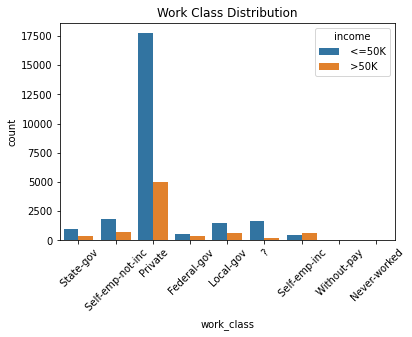

In [29]:
sns.countplot(x='work_class', data=adult, hue='income')
plt.title('Work Class Distribution')
plt.xticks(rotation=45)
plt.show()

All the cells above this are testing which features of the current dataset would be good to use for features in our three different models. 

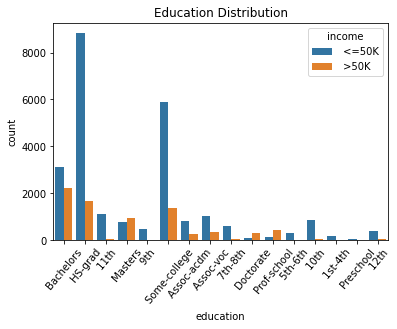

In [30]:
sns.countplot(x='education', data=adult, hue='income')
plt.title('Education Distribution')
plt.xticks(rotation=50)
plt.show()

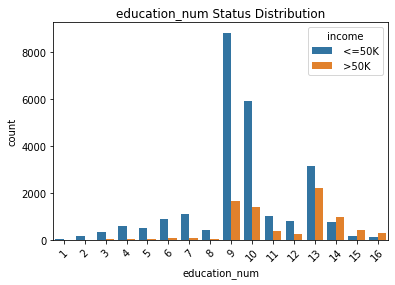

In [31]:
sns.countplot(x='education_num', data=adult, hue='income')
plt.title('education_num Status Distribution')
plt.xticks(rotation=45)
plt.show()

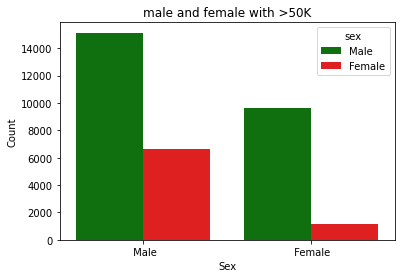

In [32]:
sns.countplot(data=adult, x='sex', hue=' >50K', palette=['green', 'red'])
plt.title('male and female with >50K')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='sex', labels=['Male', 'Female'])
plt.show()

In [33]:
adult.drop(["capital_loss", "capital_gain", "occupation", "fnlwgt", "native_country", "hours_per_week", "work_class"], axis=1, inplace=True)
adult_education = pd.get_dummies(adult['education'])
adult_family_status = pd.get_dummies(adult['family_status'])
adult_race = pd.get_dummies(adult['race'])
adult_sex = pd.get_dummies(adult['sex'])
adult.drop(["education", "family_status", "race", "sex", "martital_status", "income"], axis=1, inplace=True)
adult_complete = pd.concat([adult, adult_education, adult_family_status, adult_race, adult_sex], axis=1)
adult_complete.to_csv('adult_clean.csv', index=False)
adult_complete

,>50K,age,education_num,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,...,Own-child,Unmarried,Wife,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,Female,Male
0,0,39,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,50,13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,38,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,53,7,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,28,13,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,27,12,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
32557,1,40,9,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
32558,0,58,9,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0
32559,0,22,9,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [34]:
X = adult_complete.drop(' >50K', axis=1)
y = adult_complete[' >50K']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2222, random_state=42)

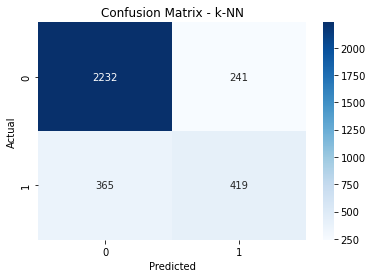

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2473
           1       0.63      0.53      0.58       784

    accuracy                           0.81      3257
   macro avg       0.75      0.72      0.73      3257
weighted avg       0.81      0.81      0.81      3257



In [41]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix - k-NN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred_knn))

In [52]:
TP1 = conf_matrix_knn[1,1]
TN1 = conf_matrix_knn[0,0]
FP1 = conf_matrix_knn[0,1]
FN1 = conf_matrix_knn[1,0]
specificity1 = (TN1/(FP1+TN1))
specificity1

0.9025475131419328

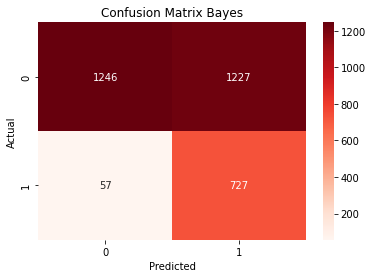

              precision    recall  f1-score   support

           0       0.96      0.50      0.66      2473
           1       0.37      0.93      0.53       784

    accuracy                           0.61      3257
   macro avg       0.66      0.72      0.60      3257
weighted avg       0.82      0.61      0.63      3257



In [57]:
Bayes = GaussianNB()
Bayes.fit(X_train, y_train)
y_pred_Bayes = Bayes.predict(X_test)

conf_matrix_Bayes = confusion_matrix(y_test, y_pred_Bayes)
sns.heatmap(conf_matrix_Bayes, annot=True, fmt='d', cmap='Reds', cbar=True)
plt.title('Confusion Matrix Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(classification_report(y_test, y_pred_Bayes))

In [51]:
TP2 = conf_matrix_Bayes[1,1]
TN2 = conf_matrix_Bayes[0,0]
FP2 = conf_matrix_Bayes[0,1]
FN2 = conf_matrix_Bayes[1,0]
specificity2 = (TN2/(FP2+TN2))
specificity2

0.5038414880711686

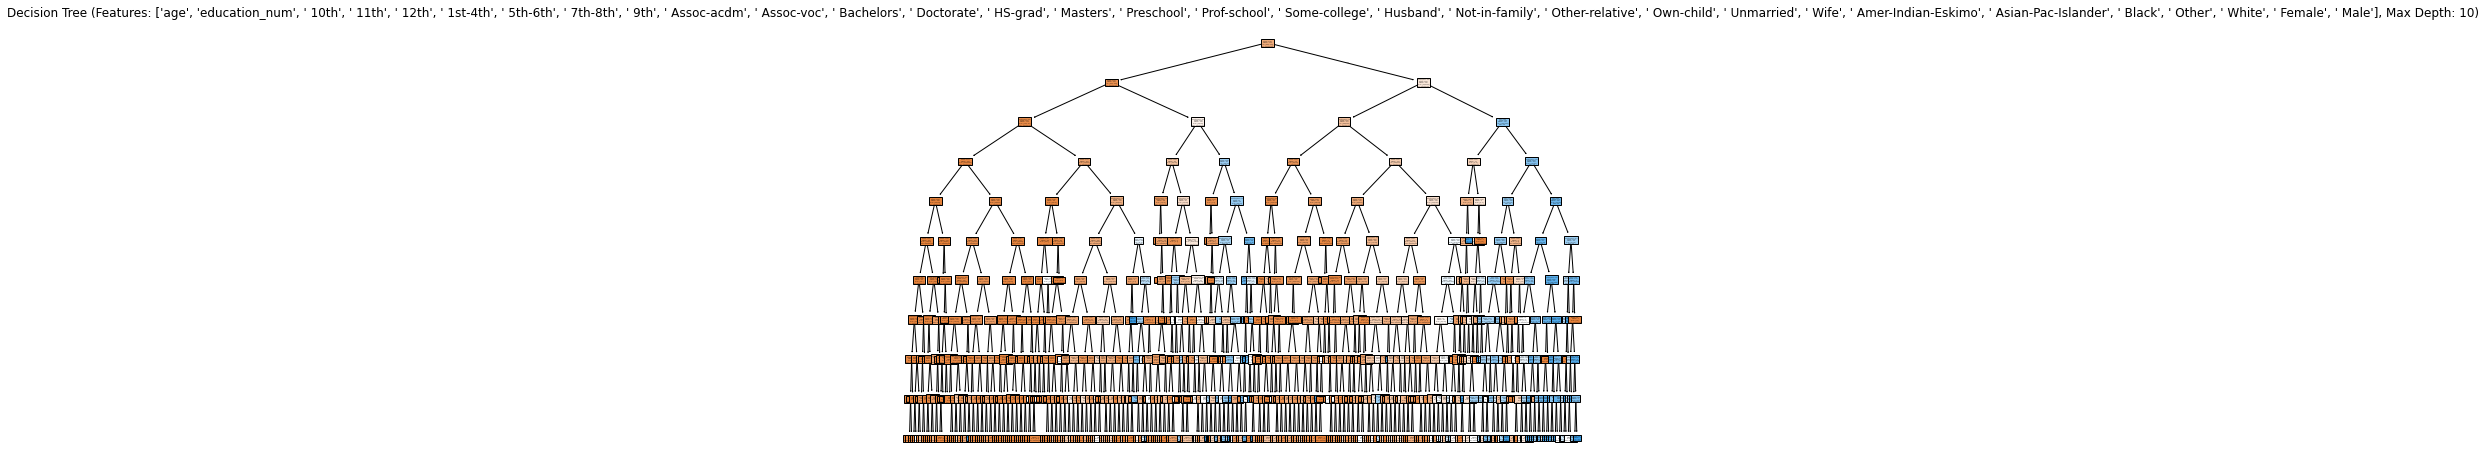

In [37]:
features = ['age', 'education_num', ' 10th', ' 11th', ' 12th', ' 1st-4th',
       ' 5th-6th', ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc',
       ' Bachelors', ' Doctorate', ' HS-grad', ' Masters', ' Preschool',
       ' Prof-school', ' Some-college', ' Husband', ' Not-in-family',
       ' Other-relative', ' Own-child', ' Unmarried', ' Wife',
       ' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White', ' Female', ' Male']
depth_limit = 10
DT = DecisionTreeClassifier(criterion= 'entropy', max_depth=depth_limit)
DT.fit(X_train[features],y_train)

y_pred_train = DT.predict(X_train[features])
y_pred_test = DT.predict(X_test[features])


plt.figure(figsize=(12,8))
plot_tree(DT, feature_names = features, class_names=['education_num', 'age', ' 10th', ' 11th', ' 12th', ' 1st-4th',
       ' 5th-6th', ' 7th-8th', ' 9th', ' Assoc-acdm', ' Assoc-voc',
       ' Bachelors', ' Doctorate', ' HS-grad', ' Masters', ' Preschool',
       ' Prof-school', ' Some-college', ' Husband', ' Not-in-family',
       ' Other-relative', ' Own-child', ' Unmarried', ' Wife',
       ' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White', ' Female', ' Male'], filled=True)
plt.title(f'Decision Tree (Features: {features}, Max Depth: {depth_limit})')
plt.show()

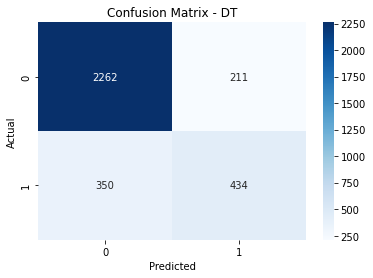

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      2473
           1       0.67      0.55      0.61       784

    accuracy                           0.83      3257
   macro avg       0.77      0.73      0.75      3257
weighted avg       0.82      0.83      0.82      3257



In [55]:
conf_matrix_dt = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Confusion Matrix - DT')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(classification_report(y_test, y_pred_test))

In [56]:
TP3 = conf_matrix_dt[1,1]
TN3 = conf_matrix_dt[0,0]
FP3 = conf_matrix_dt[0,1]
FN3 = conf_matrix_dt[1,0]
specificity3 = (TN3/(FP3+TN3))
specificity3

0.914678528103518

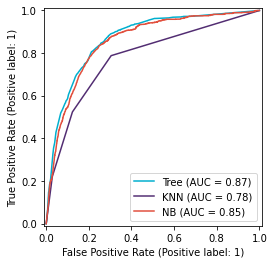

In [39]:
y_prob_knn = knn.predict_proba(X_val)[:, 1]  
y_prob_nb = Bayes.predict_proba(X_val)[:, 1]
y_prob_dt = DT.predict_proba(X_val)[:, 1]
roc_curve1 = RocCurveDisplay.from_predictions(y_val, y_prob_dt, name="Tree", color="#00AFCE")
roc_curve2 = RocCurveDisplay.from_predictions(y_val, y_prob_knn, ax=roc_curve1.ax_, name="KNN", color="#522D72")
roc_curve3 = RocCurveDisplay.from_predictions(y_val, y_prob_nb, ax=roc_curve1.ax_, name="NB", color="#E14F3D")
plt.show()